## Data analysis code for gain=5000 data taken on 06/06/2025. Correlate with absorption signal.

In [266]:
import numpy as np  
import matplotlib.pyplot as plt
import re
import os
from scipy import optimize
from scipy.ndimage import gaussian_filter
import h5py

# Binning 1x1

In [267]:
folder_path_day = r'C:\Experiments\lyman29\BaF_Fluorescence_Raster\2025\06\06'
seq = 28 #sequence number

2025-06-06_0028_BaF_Fluorescence_Raster_02.h5


<Figure size 800x600 with 0 Axes>

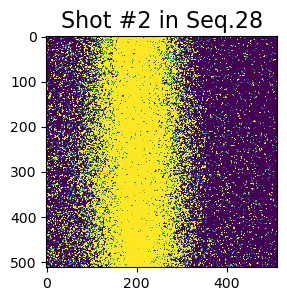

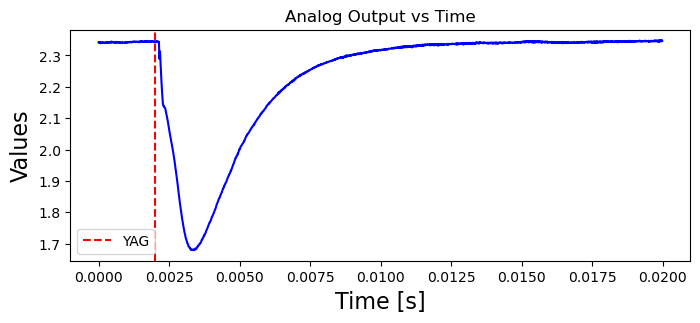

In [268]:
##Show Absorption and FLuorescence plots of a shot
shot_number =2 #Choose shot number you want to see

folder_path = folder_path_day + '\\%.4i'%seq
for count_b, filename in enumerate(os.listdir(folder_path)):
      if count_b==shot_number: 
          file_path = os.path.join(folder_path, filename)
          print(filename)
          with h5py.File(file_path, 'r') as file:
            image_data = file['images/camera/fluorescence/frame'][:]
            analog_data=file['data/traces/BaF X-B Absorption'][:]
            # print(analog_data)
            times, values = zip(*analog_data)
            # Convert to NumPy arrays if needed
            times = np.array(times)
            values = np.array(values)
            tYAG=2e-3 # Hardcoded for now...
            fig = plt.figure(2, figsize=(3, 3))
            plt.imshow(image_data, vmin = 1550, vmax = 1600)
            plt.title('Shot #%i in Seq.%i' % (shot_number, seq), fontsize=16)
            
            fig = plt.figure(4, figsize=(8, 3))
            plt.plot(times, values, 'b')
            plt.axvline(x=tYAG, color='r', linestyle='--', label='YAG')
            plt.xlabel('Time [s]', fontsize=16)
            plt.ylabel('Values', fontsize=16)
            plt.title('Analog Output vs Time')
            plt.legend()  # Add this if you want the 'YAG' label to show
            plt.show()

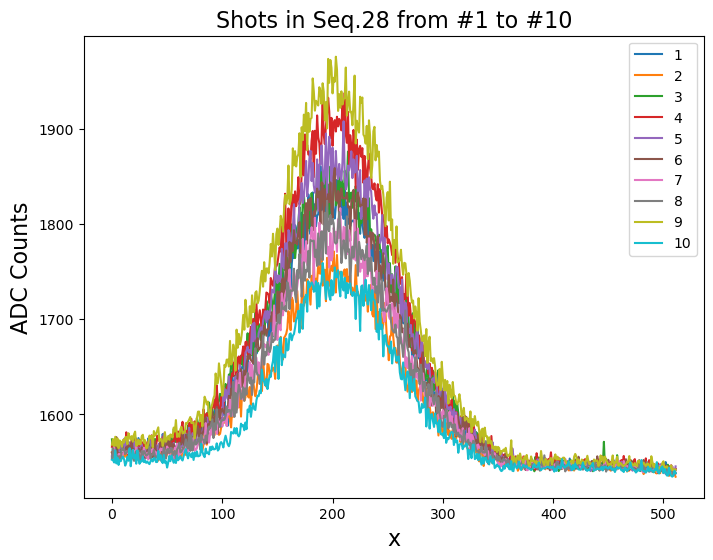

In [271]:
count_b_start=1
count_b_end=10
sum_array=[]
fig = plt.figure(20, figsize=(8,6))
# get x-cross section for every shot in the sequence
for count_b, filename in enumerate(os.listdir(folder_path)): 
    file_path = os.path.join(folder_path, filename)
    # print(filename)
    if count_b<=count_b_end and count_b>=count_b_start:
    # if np.any(np.array([4,6,8,9,12,14,15, 17, 18])==count_b):
        with h5py.File(file_path, 'r') as file:
            image_data = file['images/camera/fluorescence/frame'][:]
            cross_section_x = np.mean(image_data, axis=0)
            # if np.any(cross_section_x>1550):
            plt.plot(np.arange(512),cross_section_x, label=count_b)
            # print(count_b)
            # print(np.sum(cross_section_x))
            sum_array.append(np.sum(cross_section_x))
            # else:
                # plt.plot(np.arange(512),cross_section_x, label='')


# plt.ylim([1528,1660])
plt.xlabel('x', fontsize=16)
# plt.title('Shots in Seq.7', fontsize=16)
plt.title('Shots in Seq.%i from #%i to #%i' %(seq, count_b_start, count_b_end), fontsize=16)
plt.ylabel('ADC Counts', fontsize=16)
plt.legend()
plt.show()



1
2
5
6
7
8


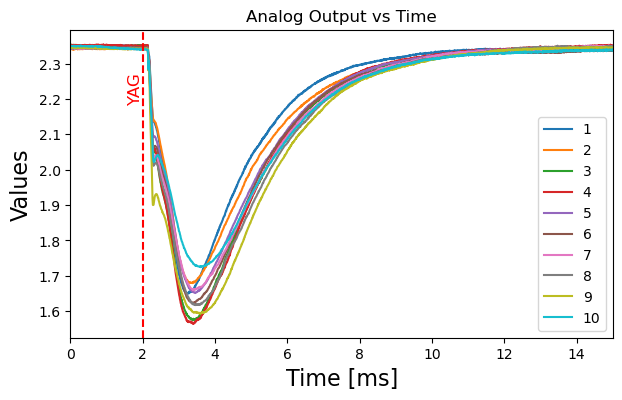

In [273]:
# ABSORPTION
plt.close()
count_b_start=1
count_b_end=10
sum_array=[]

fig = plt.figure(20, figsize=(7,4))
# get x-cross section for every shot in the sequence
for count_b, filename in enumerate(os.listdir(folder_path)): 
    file_path = os.path.join(folder_path, filename)
    # print(filename)
    if count_b<=count_b_end and count_b>=count_b_start: #POINT WE STOPPED TAKING DATA...
        # if count_b%10==2:
        # print(count_b)
        with h5py.File(file_path, 'r') as file:
            analog_data=file['data/traces/BaF X-B Absorption'][:]
            # print(analog_data)
            times, values = zip(*analog_data)
            # Convert to NumPy arrays if needed
            times = np.array(times)*1000
            values = np.array(values)
            if np.any(values<1.7):
                if not np.any(values<1.6):
                    print(count_b)
            plt.plot(times, values, label=count_b)


tYAG=2 # [ms], Hardcoded for now...
plt.text(tYAG, plt.ylim()[1]*0.95, 'YAG', color='r', fontsize=12, rotation=90,
         verticalalignment='top', horizontalalignment='right')
plt.axvline(x=tYAG, color='r', linestyle='--')
plt.xlabel('Time [ms]', fontsize=16)
plt.ylabel('Values', fontsize=16)
plt.xlim([0,15])
plt.title('Analog Output vs Time')
plt.legend()  # Add this if you want the 'YAG' label to show
plt.show()



Let's  choose 3 plots at roughly the same absorption and average, then plot Sequences 31, 32, and 33 on the same plot.

From Sequence 31: Shots 10, 12, 13

From Sequence 32: Shots 1, 3, 9

From Sequence 33: Shots 7, 13, 19

[10]
[1]
[5]


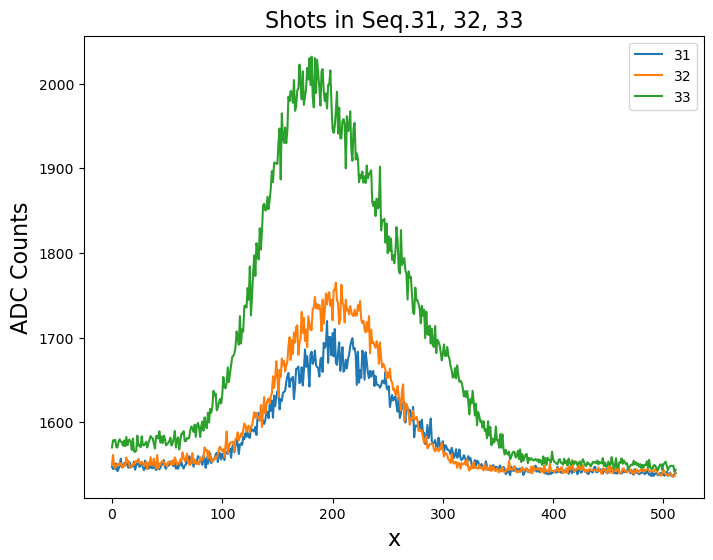

In [216]:
plt.close()
seq_array=np.array([31,32,33])
shot_array = np.array([
    [10, 12, 13],
    [1,  3,  9],
    [7, 13, 19]
])


fig = plt.figure(20, figsize=(8,6))

count=0
for seq in seq_array:
    folder_path = folder_path_day + '\\%.4i'%seq
    # get x-cross section for every shot in the sequence
    print(shot_array[count,:])
    cross_section_x_array=[]
    for count_b, filename in enumerate(os.listdir(folder_path)): 
        file_path = os.path.join(folder_path, filename)
        # print(filename)
        if np.any(count_b==shot_array[count,:]): #POINT WE STOPPED TAKING DATA...
            with h5py.File(file_path, 'r') as file:
                image_data = file['images/camera/fluorescence/frame'][:]
                cross_section_x = np.mean(image_data, axis=0)
                cross_section_x_array.append(cross_section_x)
    count+=1
    cross_section_x_average=np.mean(cross_section_x_array, axis=0)
    plt.plot(np.arange(512),cross_section_x_average, label=seq)


# plt.ylim([1528,1660])
plt.xlabel('x', fontsize=16)
plt.title('Shots in Seq.31, 32, 33', fontsize=16)
plt.ylabel('ADC Counts', fontsize=16)
plt.legend()
plt.show()



In [201]:
shot_array = np.array([
    [10, 12, 13],
    [1,  3,  9],
    [7, 13, 19]
])

count = 0
print(shot_array[count, :])

[10 12 13]


# Photon counting LIF with threshold count=1576

In [325]:
folder_path_day = r'C:\Experiments\lyman29\BaF_Fluorescence_Raster\2025\06\06'
seq = 27 #sequence number
folder_path = folder_path_day + '\\%.4i'%seq

2025-06-06_0027_BaF_Fluorescence_Raster_00.h5
2025-06-06_0027_BaF_Fluorescence_Raster_01.h5
2025-06-06_0027_BaF_Fluorescence_Raster_02.h5
2025-06-06_0027_BaF_Fluorescence_Raster_03.h5
2025-06-06_0027_BaF_Fluorescence_Raster_04.h5
2025-06-06_0027_BaF_Fluorescence_Raster_05.h5
2025-06-06_0027_BaF_Fluorescence_Raster_06.h5
2025-06-06_0027_BaF_Fluorescence_Raster_07.h5
2025-06-06_0027_BaF_Fluorescence_Raster_08.h5
2025-06-06_0027_BaF_Fluorescence_Raster_09.h5
2025-06-06_0027_BaF_Fluorescence_Raster_10.h5
2025-06-06_0027_BaF_Fluorescence_Raster_11.h5
2025-06-06_0027_BaF_Fluorescence_Raster_12.h5
2025-06-06_0027_BaF_Fluorescence_Raster_13.h5
2025-06-06_0027_BaF_Fluorescence_Raster_14.h5
2025-06-06_0027_BaF_Fluorescence_Raster_15.h5
2025-06-06_0027_BaF_Fluorescence_Raster_16.h5
2025-06-06_0027_BaF_Fluorescence_Raster_17.h5
2025-06-06_0027_BaF_Fluorescence_Raster_18.h5
2025-06-06_0027_BaF_Fluorescence_Raster_19.h5


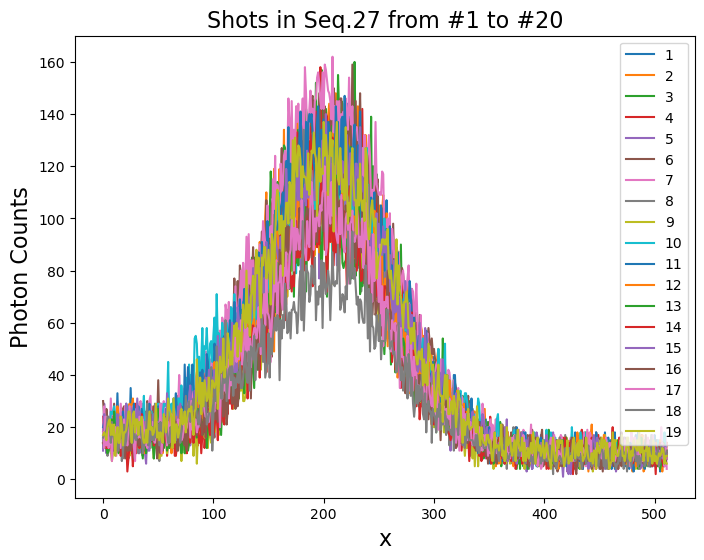

In [329]:
count_b_start=1
count_b_end=20
sum_array=[] #total photons
fig = plt.figure(20, figsize=(8,6))
# get x-cross section for every shot in the sequence
for count_b, filename in enumerate(os.listdir(folder_path)): 
    file_path = os.path.join(folder_path, filename)
    print(filename)
    if count_b<=count_b_end and count_b>=count_b_start:
    # if np.any(np.array([4,6,8,9,12,14,15, 17, 18])==count_b):
        with h5py.File(file_path, 'r') as file:
            image_data = file['images/camera/fluorescence/frame'][:]
            image_data[image_data<1576]=0
            cross_section_x = np.count_nonzero(image_data, axis=0)
            # if np.any(cross_section_x>1550):
            plt.plot(np.arange(512),cross_section_x, label=count_b)
            # print(count_b)
            # print(np.sum(cross_section_x))
            sum_array.append(np.sum(cross_section_x))
            # else:
                # plt.plot(np.arange(512),cross_section_x, label='')


# plt.ylim([1528,1660])
plt.xlabel('x', fontsize=16)
# plt.title('Shots in Seq.7', fontsize=16)
plt.title('Shots in Seq.%i from #%i to #%i' %(seq, count_b_start, count_b_end), fontsize=16)
plt.ylabel('Photon Counts', fontsize=16)
plt.legend()
plt.show()



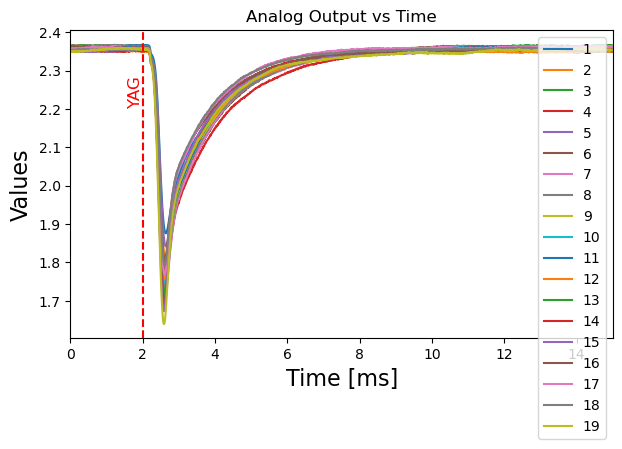

In [330]:
# ABSORPTION
plt.close()
count_b_start=1
count_b_end=20
sum_array2=[]
integral_threshold=2.3

fig = plt.figure(20, figsize=(7,4))
# get x-cross section for every shot in the sequence
for count_b, filename in enumerate(os.listdir(folder_path)): 
    file_path = os.path.join(folder_path, filename)
    # print(filename)
    if count_b<=count_b_end and count_b>=count_b_start: #POINT WE STOPPED TAKING DATA...
        # if count_b%10==2:
        # print(count_b)
        with h5py.File(file_path, 'r') as file:
            analog_data=file['data/traces/BaF X-B Absorption'][:]
            # print(analog_data)
            times, values = zip(*analog_data)
            # Convert to NumPy arrays if needed
            times = np.array(times)*1000
            values = np.array(values)
            plt.plot(times, values, label=count_b)
            integrated_absorption=np.sum(values < integral_threshold)*integral_threshold - np.sum(values[values<integral_threshold]) 
            sum_array2.append(integrated_absorption)


tYAG=2 # [ms], Hardcoded for now...
plt.text(tYAG, plt.ylim()[1]*0.95, 'YAG', color='r', fontsize=12, rotation=90,
         verticalalignment='top', horizontalalignment='right')
plt.axvline(x=tYAG, color='r', linestyle='--')
plt.xlabel('Time [ms]', fontsize=16)
plt.ylabel('Values', fontsize=16)
plt.xlim([0,15])
plt.title('Analog Output vs Time')
plt.legend()  # Add this if you want the 'YAG' label to show
plt.show()



<Figure size 640x480 with 0 Axes>

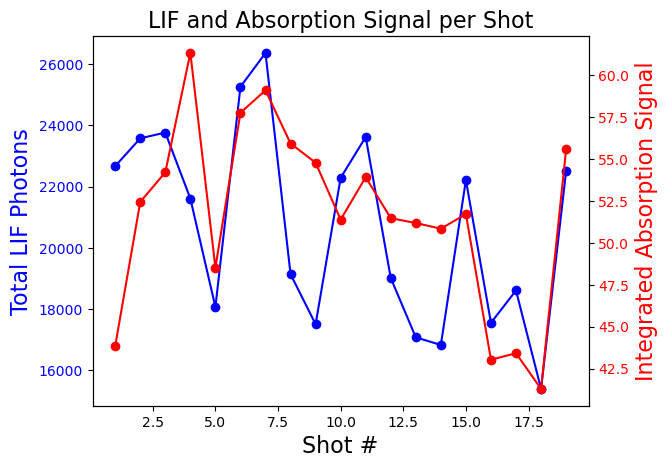

In [331]:
plt.figure()
fig, ax1 = plt.subplots()  # Create the main axis

# Left y-axis
ax1.plot(np.arange(1, 20), sum_array, 'bo-', label="LIF Photons")
ax1.set_xlabel("Shot #", fontsize=16)
ax1.set_ylabel("Total LIF Photons", fontsize=16, color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Right y-axis
ax2 = ax1.twinx()  # Create a second y-axis sharing the same x-axis
ax2.plot(np.arange(1, 20), sum_array2, 'ro-', label="Absorption Signal")
ax2.set_ylabel("Integrated Absorption Signal", fontsize=16, color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title("LIF and Absorption Signal per Shot", fontsize=16)
plt.show()